In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
data = pd.read_excel('testdata.xlsx')

In [6]:
data.head()

,Val1,Val2,Result
0,1,2,3
1,2,3,5
2,3,4,7
3,4,5,9
4,5,6,11


In [10]:
X = data.drop(['Result'],axis=1)
Y = data['Result']

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [20]:
model = LinearRegression()

In [22]:
model.fit(X_train,Y_train)

LinearRegression()

In [24]:
model.intercept_

-70.35098310899967

In [26]:
model.coef_

array([10.25174848,  4.65680259])

In [28]:
list(zip(['val1','val2'],list(model.coef_)))

[('val1', 10.251748482449191), ('val2', 4.656802586434412)]

In [30]:
y_pred=model.predict(X_test)

In [47]:
test_pred_df = pd.DataFrame({'actual':Y_test,'predicted':y_pred,'residuals':Y_test-y_pred})
test_pred_df

,actual,predicted,residuals
3,9,-6.059976,15.059976
16,153,145.839964,7.160036
6,15,38.665677,-23.665677
10,33,56.388658,-23.388658
2,7,-20.968527,27.968527
14,105,116.022862,-11.022862


In [39]:
r2 = metrics.r2_score(Y_train,model.predict(X_train))
r2

0.8313620430749706

In [43]:
mse=metrics.mean_squared_error(Y_test,y_pred)
rmse = round(np.sqrt(mse),2)
rmse

19.53

In [45]:
model.score(X_test,Y_test)

0.8769229677840121

In [49]:
model.score(X_train,Y_train)

0.8313620430749706

<Axes: ylabel='Count'>

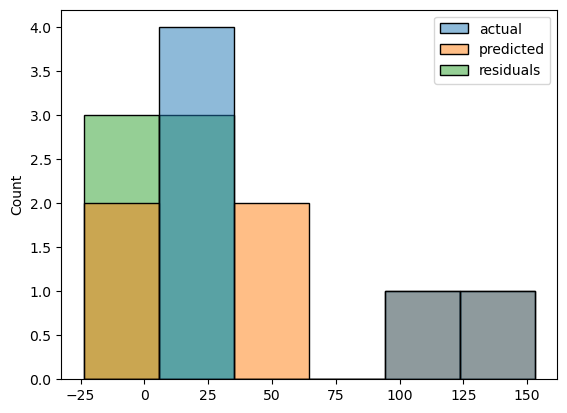

In [57]:
sns.histplot(data=test_pred_df)